In [134]:
import re
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

df = pd.read_csv('datasets/DadosEmprego.csv', sep=';', decimal=',')

In [135]:
df.head()

,Mês,Comercio,Alimento,Metalurgia
0,jan/03,322,53.5,44.2
1,fev/03,317,53.0,44.3
2,mar/03,319,53.2,44.4
3,abr/03,323,52.5,43.4
4,mai/03,327,53.4,42.8


In [136]:
def formata_mes_ano(mes_ano: str) -> str:
    (mes, ano) = mes_ano.split('/')

    if mes == 'jan':
        mes_ano = '01/' + ano
    elif mes == 'fev':
        mes_ano = '02/' + ano
    elif mes == 'mar':
        mes_ano = '03/' + ano
    elif mes == 'abr':
        mes_ano = '04/' + ano
    elif mes == 'mai':
        mes_ano = '05/' + ano
    elif mes == 'jun':
        mes_ano = '06/' + ano
    elif mes == 'jul':
        mes_ano = '07/' + ano
    elif mes == 'ago':
        mes_ano = '08/' + ano
    elif mes == 'set':
        mes_ano = '09/' + ano
    elif mes == 'out':
        mes_ano = '10/' + ano
    elif mes == 'nov':
        mes_ano = '11/' + ano
    else:
        mes_ano = '12/' + ano

    return datetime.strptime(mes_ano, '%m/%y')

In [137]:
df['Mês'] = df['Mês'].apply(formata_mes_ano)

In [138]:
df.head()

,Mês,Comercio,Alimento,Metalurgia
0,2003-01-01,322,53.5,44.2
1,2003-02-01,317,53.0,44.3
2,2003-03-01,319,53.2,44.4
3,2003-04-01,323,52.5,43.4
4,2003-05-01,327,53.4,42.8


In [163]:
def plot_estatisticas(x, y, window=3, title: str = None):
    plt.subplot(311)
    plt.plot(x, y, 'bo-', label='Original')
    plt.plot(x, y.rolling(window=window).mean(), 'r-',label= 'Média Móvel', alpha=0.3)
    plt.title(title)
    plt.legend(loc='best')

    plt.subplot(312)
    plt.hist(y)
    plt.title('Histograma')

    plt.subplot(313)
    plt.boxplot(y, vert=False)
    plt.title('Box plot')

    plt.tight_layout()

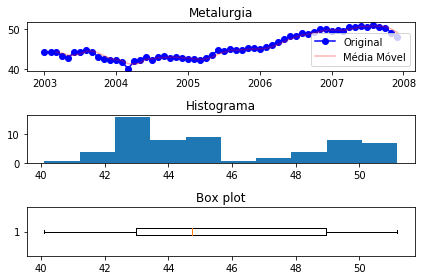

In [164]:
plot_estatisticas(df['Mês'], df['Metalurgia'], window=3, title='Metalurgia')

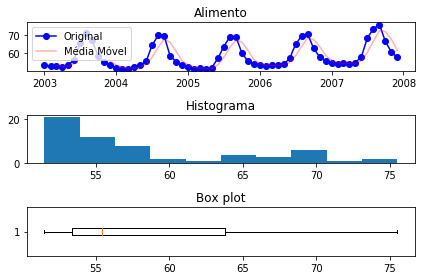

In [165]:
plot_estatisticas(df['Mês'], df['Alimento'], window=3, title='Alimento')

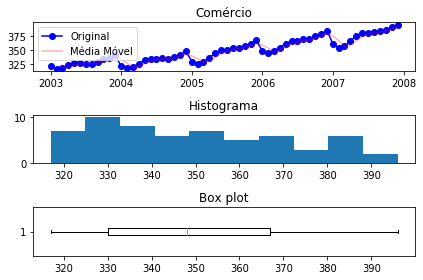

In [166]:
plot_estatisticas(df['Mês'], df['Comercio'], window=3, title='Comércio')